In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
path = '/content/drive/MyDrive/Datasets/heart_disease_risk_dataset_earlymed.csv'

In [44]:
data = pd.read_csv(path)

In [45]:
df = data[data.drop(columns=['Age']).columns]
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df.isna().sum()

,0
Chest_Pain,0
Shortness_of_Breath,0
Fatigue,0
Palpitations,0
Dizziness,0
Swelling,0
Pain_Arms_Jaw_Back,0
Cold_Sweats_Nausea,0
High_BP,0
High_Cholesterol,0


In [47]:
df.shape

(70000, 18)

In [48]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[6897  103]
 [ 102 6898]]


In [54]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7000
         1.0       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [55]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 0.9985767551020409


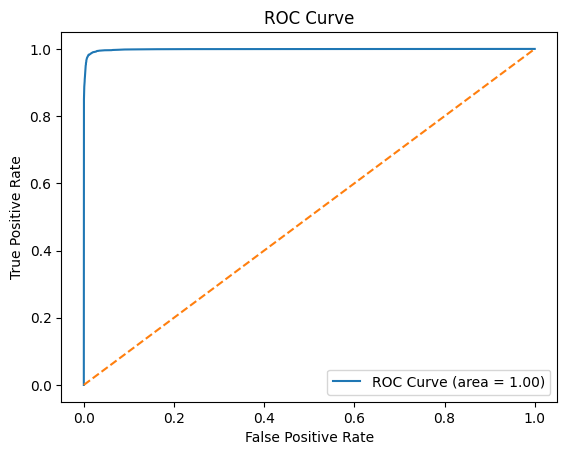

In [56]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (area = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

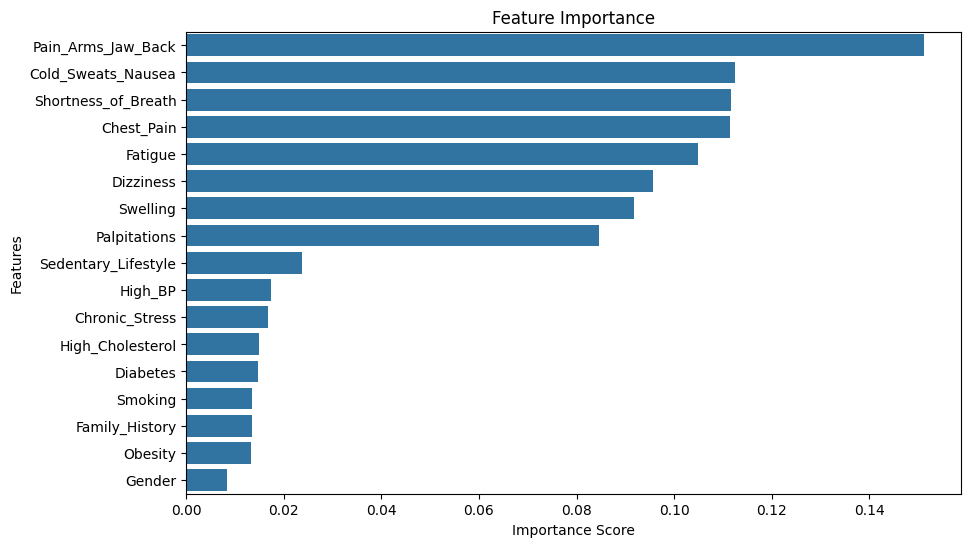

In [57]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [58]:
import joblib

joblib.dump(model, "heart_disease_rf_model.pkl", compress = 3)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [59]:
model = joblib.load("heart_disease_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

input_data = {
    'Chest_Pain':	1,
    'Shortness_of_Breath': 1,
    'Fatigue':	1,
    'Palpitations':	1,
    'Dizziness':	0,
    'Swelling':	0,
    'Pain_Arms_Jaw_Back':	1,
    'Cold_Sweats_Nausea':	0,
    'High_BP':	0,
    'High_Cholesterol':	0,
    'Diabetes':	1,
    'Smoking':	0,
    'Obesity':	1,
    'Sedentary_Lifestyle':	0,
    'Family_History':	0,
    'Chronic_Stress':	1,
    'Gender':	0
}

input_df = pd.DataFrame([input_data])

input_scaled = scaler.transform(input_df)


prediction = model.predict(input_scaled)[0]
probability = model.predict_proba(input_scaled)[0][1]

print("Prediction:", "High Risk" if prediction == 1 else "Low Risk")
print(f"Probability of heart disease: {probability*100:.2f}%")


Prediction: High Risk
Probability of heart disease: 61.00%


In [60]:
app_py_content = '''import streamlit as st
import pandas as pd
import numpy as np
import joblib

model = joblib.load("heart_disease_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Heart Disease Risk Predictor", layout="centered")
st.title("🫀 Heart Disease Risk Prediction")
st.write("Provide your symptoms and risk factors to check the chances of heart disease.")

def user_input():
    Chest_Pain = st.selectbox("Chest Pain", ["Yes", "No"])
    Chest_Pain = 1 if Chest_Pain == "Yes" else 0
    Shortness_of_Breath = st.selectbox("Shortness of Breath", ["Yes", "No"])
    Shortness_of_Breath = 1 if Shortness_of_Breath == "Yes" else 0
    Fatigue = st.selectbox("Fatigue", ["Yes", "No"])
    Fatigue = 1 if Fatigue == "Yes" else 0
    Palpitations = st.selectbox("Palpitations", ["Yes", "No"])
    Palpitations = 1 if Palpitations == "Yes" else 0
    Dizziness = st.selectbox("Dizziness", ["Yes", "No"])
    Dizziness = 1 if Dizziness == "Yes" else 0
    Swelling = st.selectbox("Swelling", ["Yes", "No"])
    Swelling = 1 if Swelling == "Yes" else 0
    Pain_Arms_Jaw_Back = st.selectbox("Pain in Arms/Jaw/Back", ["Yes", "No"])
    Pain_Arms_Jaw_Back = 1 if Pain_Arms_Jaw_Back == "Yes" else 0
    Cold_Sweats_Nausea = st.selectbox("Cold Sweats/Nausea", ["Yes", "No"])
    Cold_Sweats_Nausea = 1 if Cold_Sweats_Nausea == "Yes" else 0
    High_BP = st.selectbox("High Blood Pressure", ["Yes", "No"])
    High_BP = 1 if High_BP == "Yes" else 0
    High_Cholesterol = st.selectbox("High Cholesterol", ["Yes", "No"])
    High_Cholesterol = 1 if High_Cholesterol == "Yes" else 0
    Diabetes = st.selectbox("Diabetes", ["Yes", "No"])
    Diabetes = 1 if Diabetes == "Yes" else 0
    Smoking = st.selectbox("Smoking", ["Yes", "No"])
    Smoking = 1 if Smoking == "Yes" else 0
    Obesity = st.selectbox("Obesity", ["Yes", "No"])
    Obesity = 1 if Obesity == "Yes" else 0
    Sedentary_Lifestyle = st.selectbox("Sedentary Lifestyle", ["Yes", "No"])
    Sedentary_Lifestyle = 1 if Sedentary_Lifestyle == "Yes" else 0
    Family_History = st.selectbox("Family History", ["Yes", "No"])
    Family_History = 1 if Family_History == "Yes" else 0
    Chronic_Stress = st.selectbox("Chronic Stress", ["Yes", "No"])
    Chronic_Stress = 1 if Chronic_Stress == "Yes" else 0
    Gender = st.radio("Gender", ["Male", "Female"])
    Gender = 1 if Gender == "Male" else 0

    data = {
        'Chest_Pain': Chest_Pain,
        'Shortness_of_Breath': Shortness_of_Breath,
        'Fatigue': Fatigue,
        'Palpitations': Palpitations,
        'Dizziness': Dizziness,
        'Swelling': Swelling,
        'Pain_Arms_Jaw_Back': Pain_Arms_Jaw_Back,
        'Cold_Sweats_Nausea': Cold_Sweats_Nausea,
        'High_BP': High_BP,
        'High_Cholesterol': High_Cholesterol,
        'Diabetes': Diabetes,
        'Smoking': Smoking,
        'Obesity': Obesity,
        'Sedentary_Lifestyle': Sedentary_Lifestyle,
        'Family_History': Family_History,
        'Chronic_Stress': Chronic_Stress,
        'Gender': Gender
    }

    return pd.DataFrame([data])

# Get input
input_df = user_input()

# Prediction button
if st.button("Predict"):
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    st.subheader("Prediction Result:")
    if prediction == 1:
        st.error(f"🔴 High Risk of Heart Disease ({probability*100:.2f}% probability)")
    else:
        st.success(f"🟢 Low Risk of Heart Disease ({probability*100:.2f}% probability)")
'''

In [61]:
requirements_txt_content = '''streamlit
pandas
numpy
scikit-learn
joblib
'''

app_path = "app.py"
req_path = "requirements.txt"

with open(app_path, "w") as f:
    f.write(app_py_content)

with open(req_path, "w") as f:
    f.write(requirements_txt_content)

app_path, req_path

('app.py', 'requirements.txt')